In [3]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pre = Preprocessing('fer2013')
train = pre.load_data(filename='train_norm.csv', name='train')

#### I will duplicate all the data

In [5]:
len(train)

28709

In [6]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [7]:
array_0 = train.drop(columns = ['emotion']).values[0]

In [8]:
img_conv = ImageConverter()

In [9]:
array_0_frame = img_conv.reshape_array_to_frame(array_0)

In [10]:
array_0_frame_flipped = img_conv.flip_frame_horitzontally(array_0_frame)

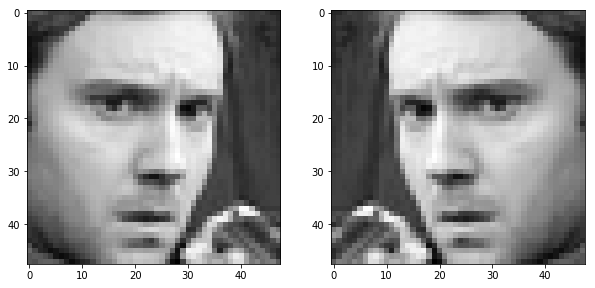

In [11]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_0_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_0_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [12]:
train_np = train.drop(columns = ['emotion']).values

In [13]:
flipped_train_np = np.zeros(shape=train_np.shape)
for i in range(len(train_np)):
    flipped_np = img_conv.flip_frame_horitzontally(img_conv.reshape_array_to_frame(train_np[i]))
    flipped_train_np[i] = img_conv.reshape_frame_to_array(flipped_np)

In [14]:
flipped_train_np

array([[0.16078431, 0.16862745, 0.20392157, ..., 0.32941176, 0.28235294,
        0.30196078],
       [0.47058824, 0.54901961, 0.50588235, ..., 0.7254902 , 0.72156863,
        0.72941176],
       [0.0627451 , 0.10588235, 0.17254902, ..., 0.98039216, 0.98431373,
        0.98039216],
       ...,
       [0.75294118, 0.74901961, 0.74117647, ..., 0.43137255, 0.38039216,
        0.34509804],
       [0.47843137, 0.51764706, 0.54117647, ..., 0.60784314, 0.65882353,
        0.70980392],
       [0.30196078, 0.54901961, 0.71372549, ..., 0.37254902, 0.30980392,
        0.23921569]])

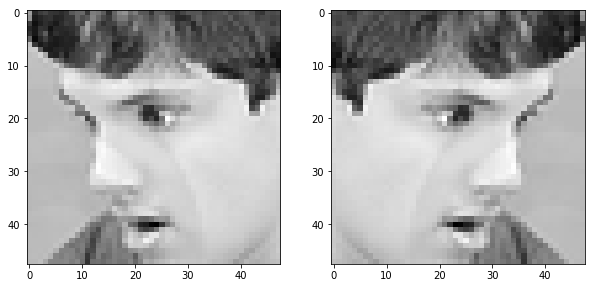

In [15]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(img_conv.reshape_array_to_frame(train_np[510]), cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(img_conv.reshape_array_to_frame(flipped_train_np[510]), cmap='gray', interpolation='none')
plt.show()

In [16]:
#Seems to work, going to save the data

In [17]:
new_train = pd.DataFrame(flipped_train_np)
new_train['emotion'] = train['emotion']
new_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
28704,0.341176,0.337255,0.337255,0.333333,0.333333,0.333333,0.329412,0.333333,0.333333,0.333333,...,0.129412,0.223529,0.325490,0.384314,0.345098,0.270588,0.258824,0.372549,0.419608,2
28705,0.576471,0.439216,0.325490,0.384314,0.317647,0.447059,0.431373,0.345098,0.313725,0.388235,...,0.219608,0.254902,0.309804,0.333333,0.368627,0.400000,0.313725,0.243137,0.239216,0
28706,0.752941,0.749020,0.741176,0.733333,0.745098,0.752941,0.760784,0.756863,0.752941,0.745098,...,0.803922,0.756863,0.686275,0.627451,0.552941,0.486275,0.431373,0.380392,0.345098,4
28707,0.478431,0.517647,0.541176,0.572549,0.607843,0.627451,0.619608,0.635294,0.650980,0.658824,...,0.600000,0.623529,0.627451,0.619608,0.600000,0.592157,0.607843,0.658824,0.709804,0
28708,0.301961,0.549020,0.713725,0.756863,0.745098,0.725490,0.709804,0.705882,0.725490,0.725490,...,0.803922,0.792157,0.756863,0.584314,0.435294,0.443137,0.372549,0.309804,0.239216,4


In [18]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [20]:
new_train.columns = train.columns 

In [21]:
train_expanded = pd.concat([train, new_train], axis = 0)

In [22]:
train_expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,0
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,0
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,4
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,6


In [23]:
train_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57418 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 1010.2 MB


In [ ]:
pre.set(name='train_expanded', value=train_expanded)
pre.save(name= 'train_expanded')